# Import Library

In [1]:
# import library
import numpy as np # pemrosesan matrix
import matplotlib.pyplot as plt # visualisasi
from tensorflow.keras.datasets import mnist # datasets

# Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

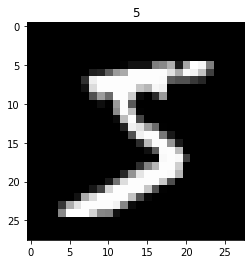

In [6]:
plt.imshow(x_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

# Data Preparation

In [7]:
new_x_train = x_train.reshape(-1, 784).astype(np.float32)
new_x_test = x_test.reshape(-1, 784).astype(np.float32)

In [8]:
new_x_train.shape

(60000, 784)

In [9]:
# min-max normalisation 
# rentang 0-1
new_x_train /= 255
new_x_train /= 255

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
new_y_train = to_categorical(y_train, 10)
new_y_test = to_categorical(y_test, 10)

# Buat Model 

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(new_x_train, new_y_train, validation_data=(new_x_test, new_y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8957 - accuracy: 0.7349 - val_loss: 13721.6748 - val_accuracy: 0.7763
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4275 - accuracy: 0.8752 - val_loss: 17784.1816 - val_accuracy: 0.7484
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3744 - accuracy: 0.8908 - val_loss: 16764.3027 - val_accuracy: 0.7758
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3396 - accuracy: 0.9018 - val_loss: 14116.6670 - val_accuracy: 0.8151
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3082 - accuracy: 0.9114 - val_loss: 11713.4639 - val_accuracy: 0.8438
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2774 - accuracy: 0.9198 - val_loss: 10755.7998 - val_accuracy: 0.8596
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2509 - accuracy: 0.9271 - val_loss

In [17]:
model.save('model.h5')